1. Normalize data
1.1. Min/max
* STD
2. Train test split
2.1. %
2.2. random split (in the book)

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
import help_function

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


3. Preprocess

I preprocess the data by creating images and labels from the financial time series.
* Each image will represent num_mins days and the channels are the features.
* Each image is modified so that its features take values between 0 and 1.
* The labels are built from the future return after horizon days, with two (exclusive) possible classes.
A new image is built every step mins.

In [121]:
df = pd.read_csv('data/train_data.csv', index_col=0,parse_dates=True)
required_rows = 14*24*60
df = df [-required_rows:]

df.head()


,price,volume
time,,
2021-12-17 23:58:00,15148.93,32.390450
2021-12-17 23:59:00,15158.34,9.746771
2021-12-18 00:00:00,15161.19,17.465829
2021-12-18 00:01:00,15134.19,9.945004
2021-12-18 00:02:00,15137.46,29.746261


In [129]:
data = df.to_numpy()
x_train, y_train, x_test, y_test = help_function.prepare_data(data,scaler = 'min_max')

print(x_train.shape)
print(y_train.shape)

(3216, 60, 2)
(3216, 2)


In [136]:
x_train[0].shape

(60, 2)

2.
3. Build model

In [130]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Reshape
from tensorflow.keras.layers import Conv1D, Lambda, Flatten


In [131]:
def build_cnn1d_model(input_shape, num_classes):

    ## 1D CNN neural network
    model = Sequential()
    model.add(Reshape(input_shape, input_shape=input_shape))
    model.add(Conv1D(8, 16, activation='relu', use_bias=False, padding="causal", strides=1))
    model.add(Conv1D(8, 16, activation='relu', padding="causal", dilation_rate=2))
    #model.add(Conv1D(16, 2, activation='relu', padding="causal", dilation_rate=4))
    #model.add(Conv1D(16, 2, activation='relu', padding="causal", dilation_rate=8))
    model.add(Lambda(lambda x: x[:, -1, :])) ## select just the last observations
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))

    return(model)

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_26 (Reshape)        (None, 60, 2)             0         
                                                                 
 conv1d_16 (Conv1D)          (None, 60, 8)             256       
                                                                 
 conv1d_17 (Conv1D)          (None, 60, 8)             1032      
                                                                 
 lambda_9 (Lambda)           (None, 8)                 0         
                                                                 
 flatten_8 (Flatten)         (None, 8)                 0         
                                                                 
 dense_25 (Dense)            (None, 2)                 18        
                                                                 
Total params: 1,306
Trainable params: 1,306
Non-train

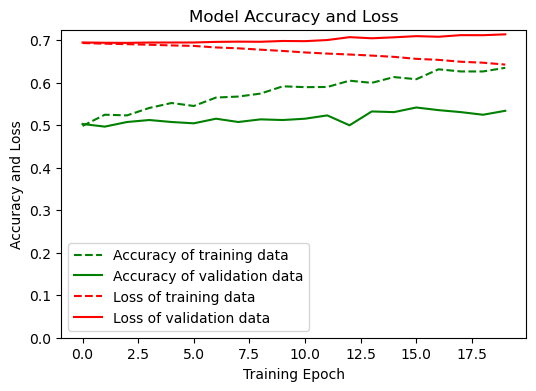

26/26 [==============================] - 0s 2ms/step - loss: 0.7315 - accuracy: 0.4938

Accuracy on test data: 0.49

Loss on test data: 0.73
26/26 [==============================] - 0s 1ms/step

Percentage of UP on test data: 51.00

Confusion matrix on test data:
 [[163 231]
 [176 234]]

F1 score on test data: 0.53


In [132]:
help_function.train_plot_model(x_train, y_train, x_test, y_test,
                      model = build_cnn1d_model(input_shape, num_classes))



Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_24 (Reshape)        (None, 60, 2)             0         
                                                                 
 lstm_37 (LSTM)              (None, 60, 20)            1840      
                                                                 
 lstm_38 (LSTM)              (None, 40)                9760      
                                                                 
 dense_23 (Dense)            (None, 2)                 82        
                                                                 
Total params: 11,682
Trainable params: 11,682
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
81/81 [==============================] - 15s 53ms/step - loss: 0.6956 - accuracy: 0.4848 - val_loss: 0.6919 - val_accuracy: 0.5264

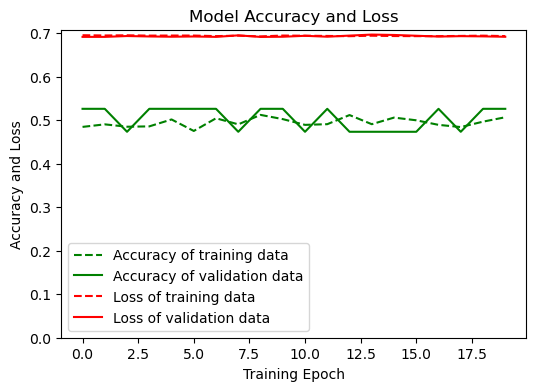

26/26 [==============================] - 0s 8ms/step - loss: 0.6922 - accuracy: 0.5236

Accuracy on test data: 0.52

Loss on test data: 0.69
26/26 [==============================] - 1s 8ms/step

Percentage of UP on test data: 52.36

Confusion matrix on test data:
 [[  0 383]
 [  0 421]]

F1 score on test data: 0.69


In [126]:

#lstm
#train -> trade
from tensorflow.keras.layers import LSTM

def build_lstm_model(input_shape, num_classes):
    model = Sequential()
    model.add(Reshape(input_shape, input_shape=input_shape))

    model.add(LSTM(20, return_sequences=True))
    model.add(LSTM(40, return_sequences=False))
    model.add(Dense(2, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return(model)
help_function.train_plot_model(x_train, y_train, x_test, y_test,
                      model = build_lstm_model(input_shape, num_classes))

In [ ]:
from tensorflow.keras.layers import Bidirectional

def build_bi_lstm_model():
      model = Sequential()
      model.add(Reshape(input_shape, input_shape=input_shape))

      model.add(Bidirectional(LSTM(1024, return_sequences=True)))
      model.add(Bidirectional(LSTM(512, return_sequences=True)))
      model.add(Bidirectional(LSTM(256, return_sequences=True)))
      model.add(Bidirectional(LSTM(128, return_sequences=True)))
      model.add(Bidirectional(LSTM(64)))
      model.add(Dense(2,  activation='sigmoid'))

      return(model)
help__func.train_plot_model(x_train, y_train, x_test, y_test,
                      model = build_bi_lstm_model())

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_19 (Reshape)        (None, 60, 2)             0         
                                                                 
 bidirectional_5 (Bidirectio  (None, 60, 2048)         8413184   
 nal)                                                            
                                                                 
 bidirectional_6 (Bidirectio  (None, 60, 1024)         10489856  
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 60, 512)          2623488   
 nal)                                                            
                                                                 
 bidirectional_8 (Bidirectio  (None, 60, 256)          656384    
 nal)                                                

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_20 (Reshape)        (None, 60, 2)             0         
                                                                 
 conv1d_6 (Conv1D)           (None, 60, 8)             256       
                                                                 
 conv1d_7 (Conv1D)           (None, 60, 8)             1032      
                                                                 
 lambda_4 (Lambda)           (None, 8)                 0         
                                                                 
 flatten_3 (Flatten)         (None, 8)                 0         
                                                                 
 dense_19 (Dense)            (None, 2)                 18        
                                                                 
Total params: 1,306
Trainable params: 1,306
Non-train

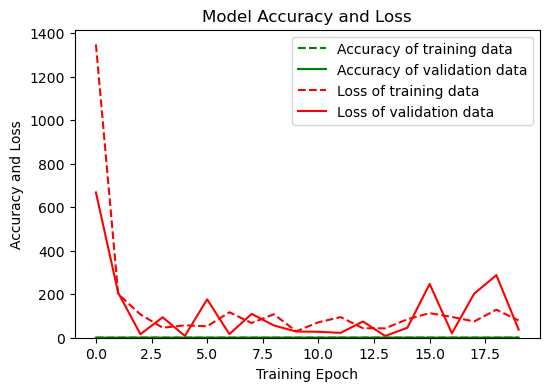

13/13 [==============================] - 0s 3ms/step - loss: 45.8586 - accuracy: 0.4838

Accuracy on test data: 0.48

Loss on test data: 45.86
13/13 [==============================] - 0s 1ms/step


UnboundLocalError: local variable 'f1_score' referenced before assignment

In [108]:
x_train, y_train, x_test, y_test = prepare_data(data,
                                                scaler = 'std')
help__func.train_plot_model(x_train, y_train, x_test, y_test,
                      model = build_cnn1d_model(input_shape, num_classes))